In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('olympic_games.csv')

In [3]:
data.head(5)

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze
0,2022,Winter,China,Beijing,2834,91,109,Australia,1,2,1
1,2022,Winter,China,Beijing,2834,91,109,Austria,7,7,4
2,2022,Winter,China,Beijing,2834,91,109,Belarus,0,2,0
3,2022,Winter,China,Beijing,2834,91,109,Belgium,1,0,1
4,2022,Winter,China,Beijing,2834,91,109,Canada,4,8,14


In [4]:
data.tail(5)

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze
1776,1896,Summer,Greece,Athens,241,14,43,Hungary,2,1,3
1777,1896,Summer,Greece,Athens,241,14,43,Mixed team,1,0,1
1778,1896,Summer,Greece,Athens,241,14,43,Switzerland,1,2,0
1779,1896,Summer,Greece,Athens,241,14,43,United Kingdom,3,3,3
1780,1896,Summer,Greece,Athens,241,14,43,United States of America,11,7,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          1781 non-null   int64 
 1   games_type    1781 non-null   object
 2   host_country  1781 non-null   object
 3   host_city     1781 non-null   object
 4   athletes      1781 non-null   int64 
 5   teams         1781 non-null   int64 
 6   competitions  1781 non-null   int64 
 7   country       1781 non-null   object
 8   gold          1781 non-null   int64 
 9   silver        1781 non-null   int64 
 10  bronze        1781 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 153.2+ KB


In [6]:
data.describe()

,year,athletes,teams,competitions,gold,silver,bronze
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,1980.679394,6135.094329,118.057833,185.499719,3.747333,3.723189,3.976418
std,31.902572,3899.002862,68.583661,100.780207,7.557803,6.388830,6.146937
min,1896.000000,241.000000,12.000000,14.000000,0.000000,0.000000,0.000000
25%,1960.000000,2566.000000,59.000000,102.000000,0.000000,0.000000,1.000000
50%,1988.000000,5338.000000,92.000000,172.000000,1.000000,2.000000,2.000000
75%,2008.000000,10568.000000,199.000000,300.000000,4.000000,4.000000,5.000000
max,2022.000000,11420.000000,207.000000,339.000000,83.000000,78.000000,77.000000


In [7]:
data=data.drop_duplicates()

In [8]:
data.rename(columns={"gold":"gold_medals",
                     "silver":"silver_medals",
                     "bronze":"bronze_medals"}, inplace=True)
data

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold_medals,silver_medals,bronze_medals
0,2022,Winter,China,Beijing,2834,91,109,Australia,1,2,1
1,2022,Winter,China,Beijing,2834,91,109,Austria,7,7,4
2,2022,Winter,China,Beijing,2834,91,109,Belarus,0,2,0
3,2022,Winter,China,Beijing,2834,91,109,Belgium,1,0,1
4,2022,Winter,China,Beijing,2834,91,109,Canada,4,8,14
...,...,...,...,...,...,...,...,...,...,...,...
1776,1896,Summer,Greece,Athens,241,14,43,Hungary,2,1,3
1777,1896,Summer,Greece,Athens,241,14,43,Mixed team,1,0,1
1778,1896,Summer,Greece,Athens,241,14,43,Switzerland,1,2,0
1779,1896,Summer,Greece,Athens,241,14,43,United Kingdom,3,3,3


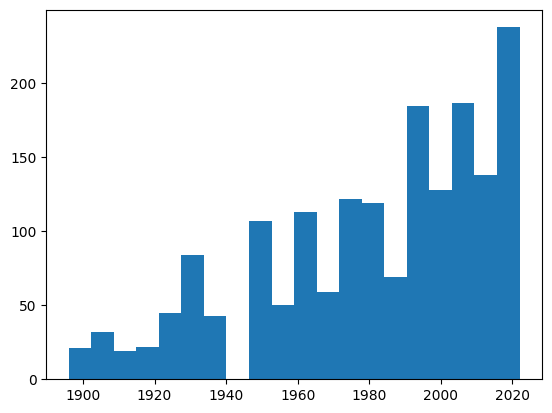

In [9]:
plt.hist(data['year'], bins=20)
plt.savefig('1.png')

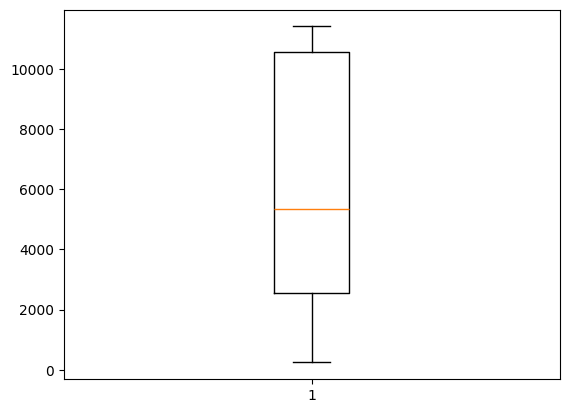

In [10]:
plt.boxplot(x=data['athletes'])
plt.savefig('2.png')

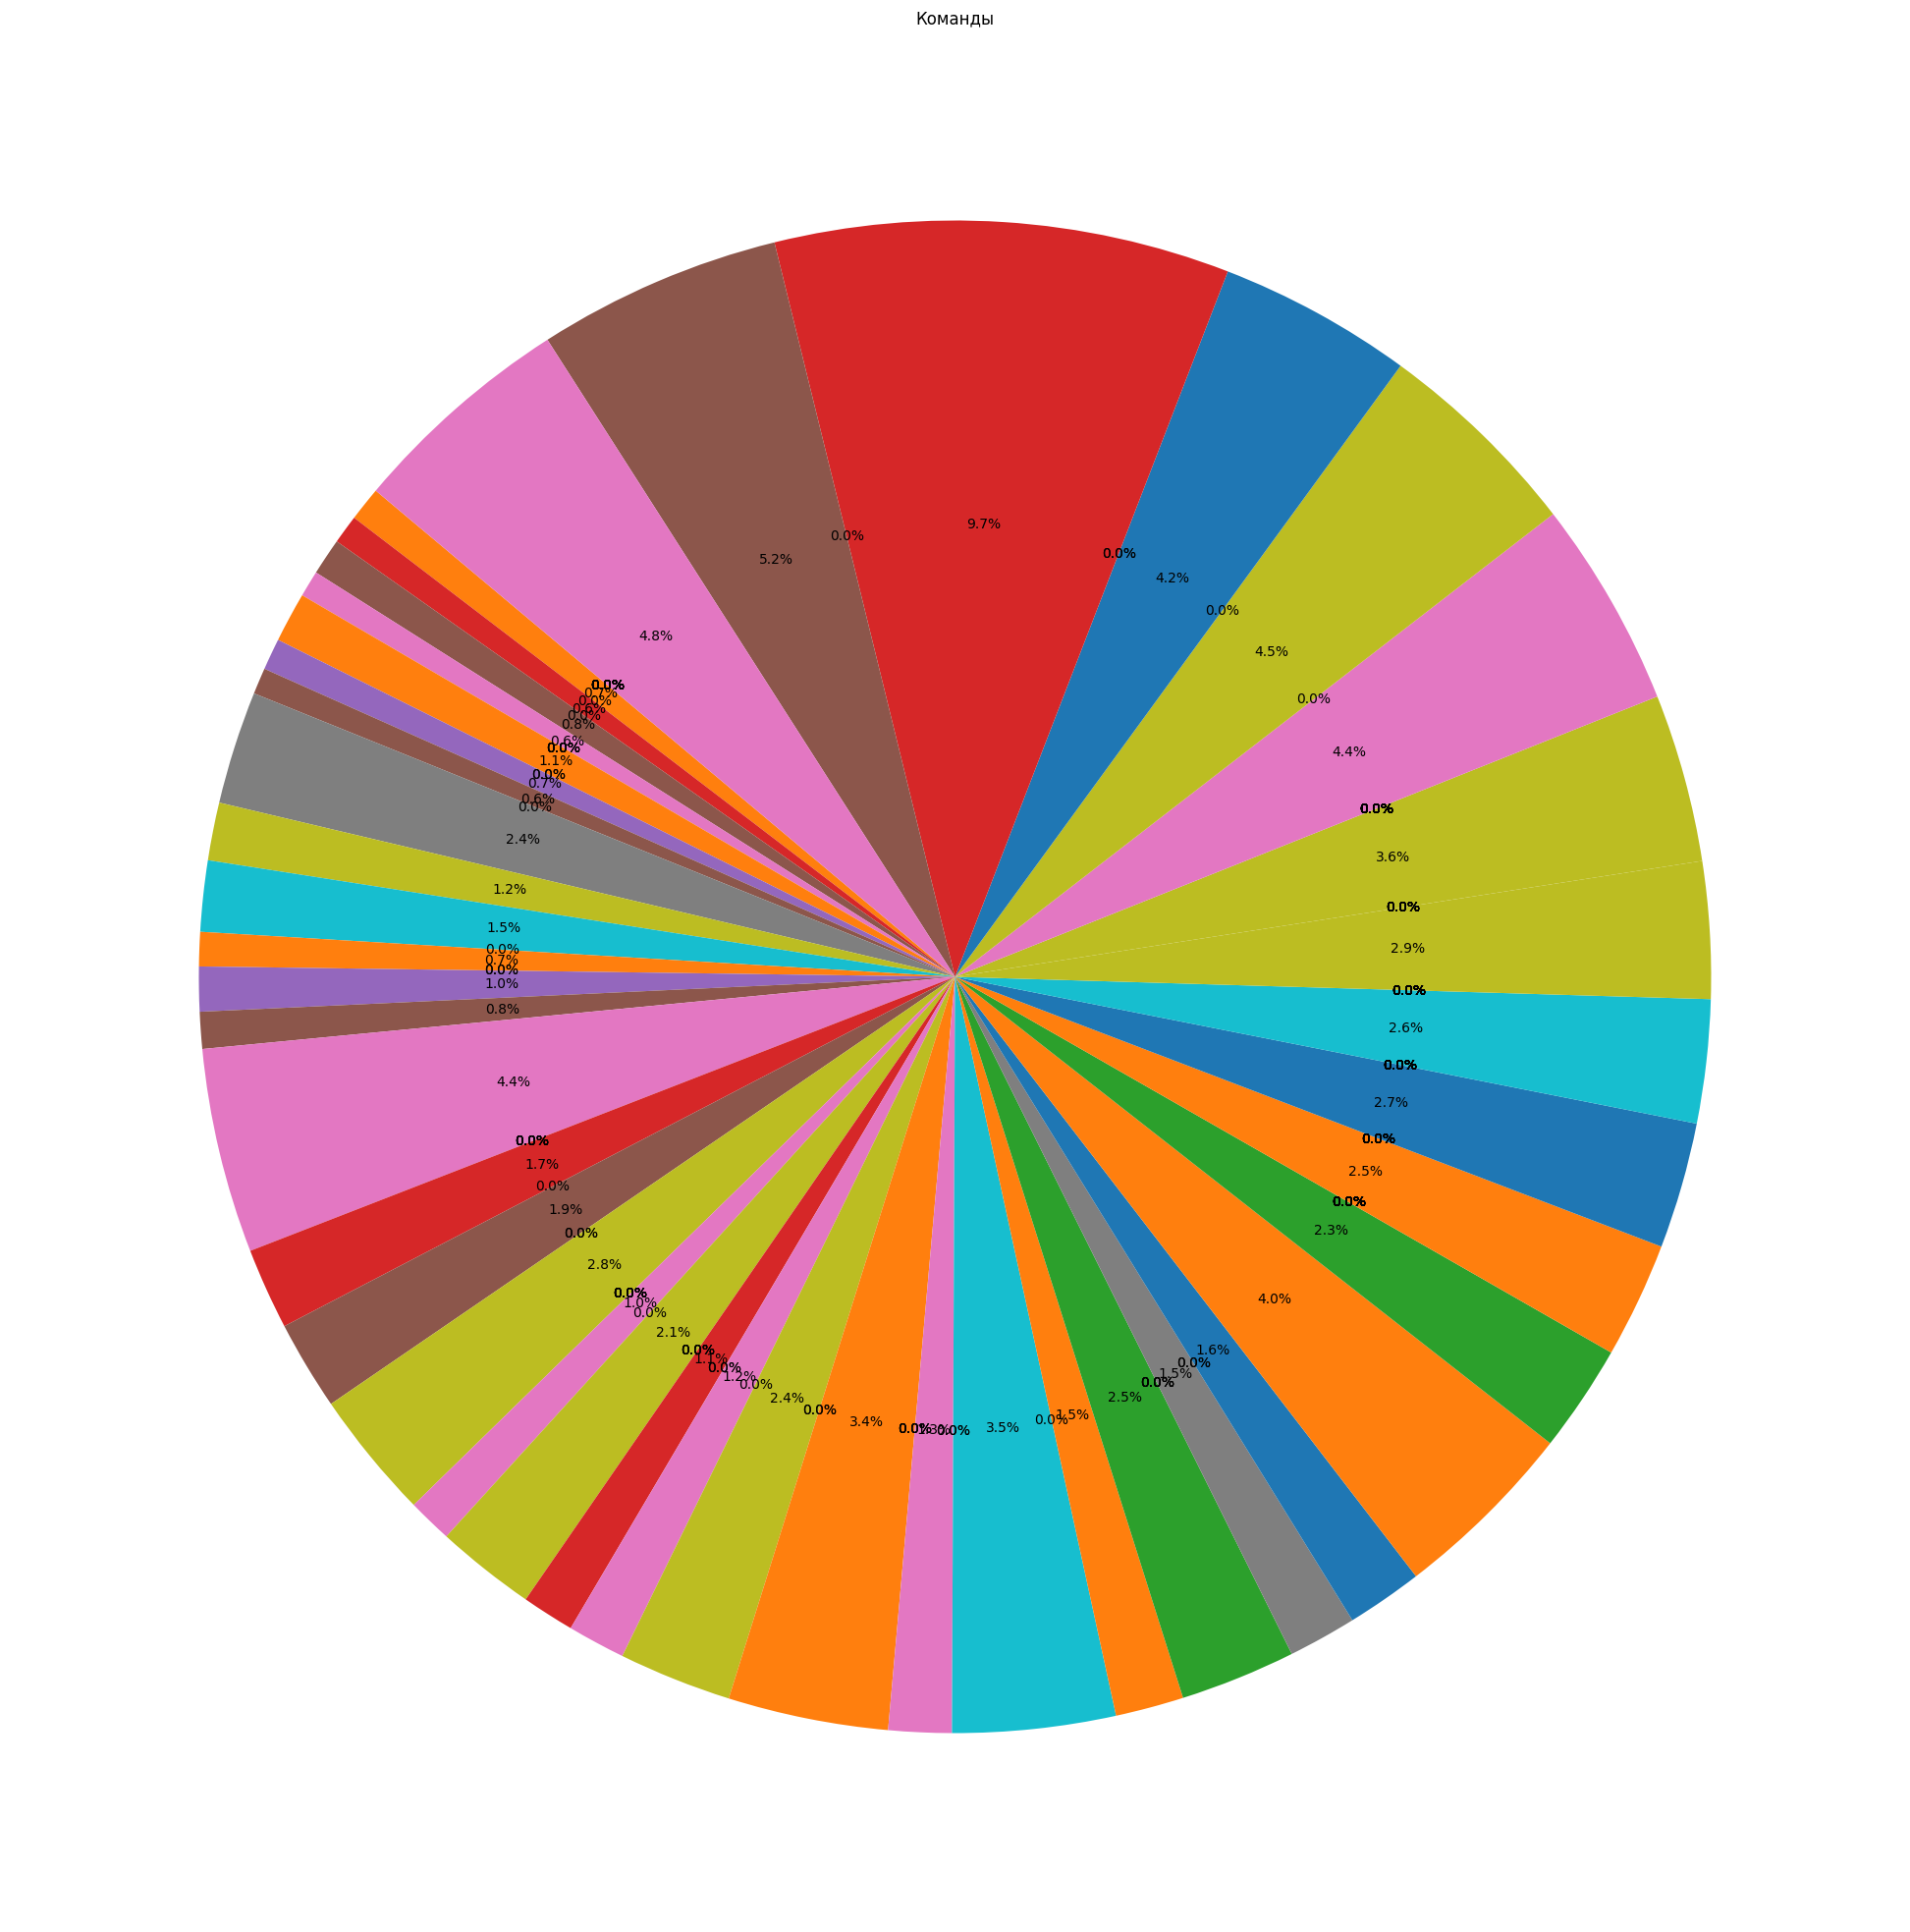

In [11]:
fig, axs = plt.subplots(figsize=(25, 25))

count_numbers = np.bincount(data['teams'])

axs.pie(count_numbers[1:], autopct='%1.1f%%', startangle=140)
axs.set_title('Команды',)
fig.savefig('3.png')

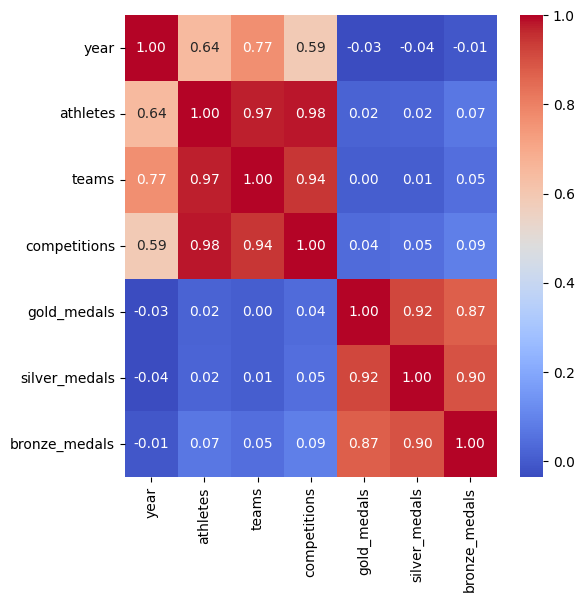

In [12]:
plt.figure(figsize = (6,6))
sns.heatmap(data[['year','athletes','teams','competitions','gold_medals','silver_medals','bronze_medals']].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.savefig('4.png')

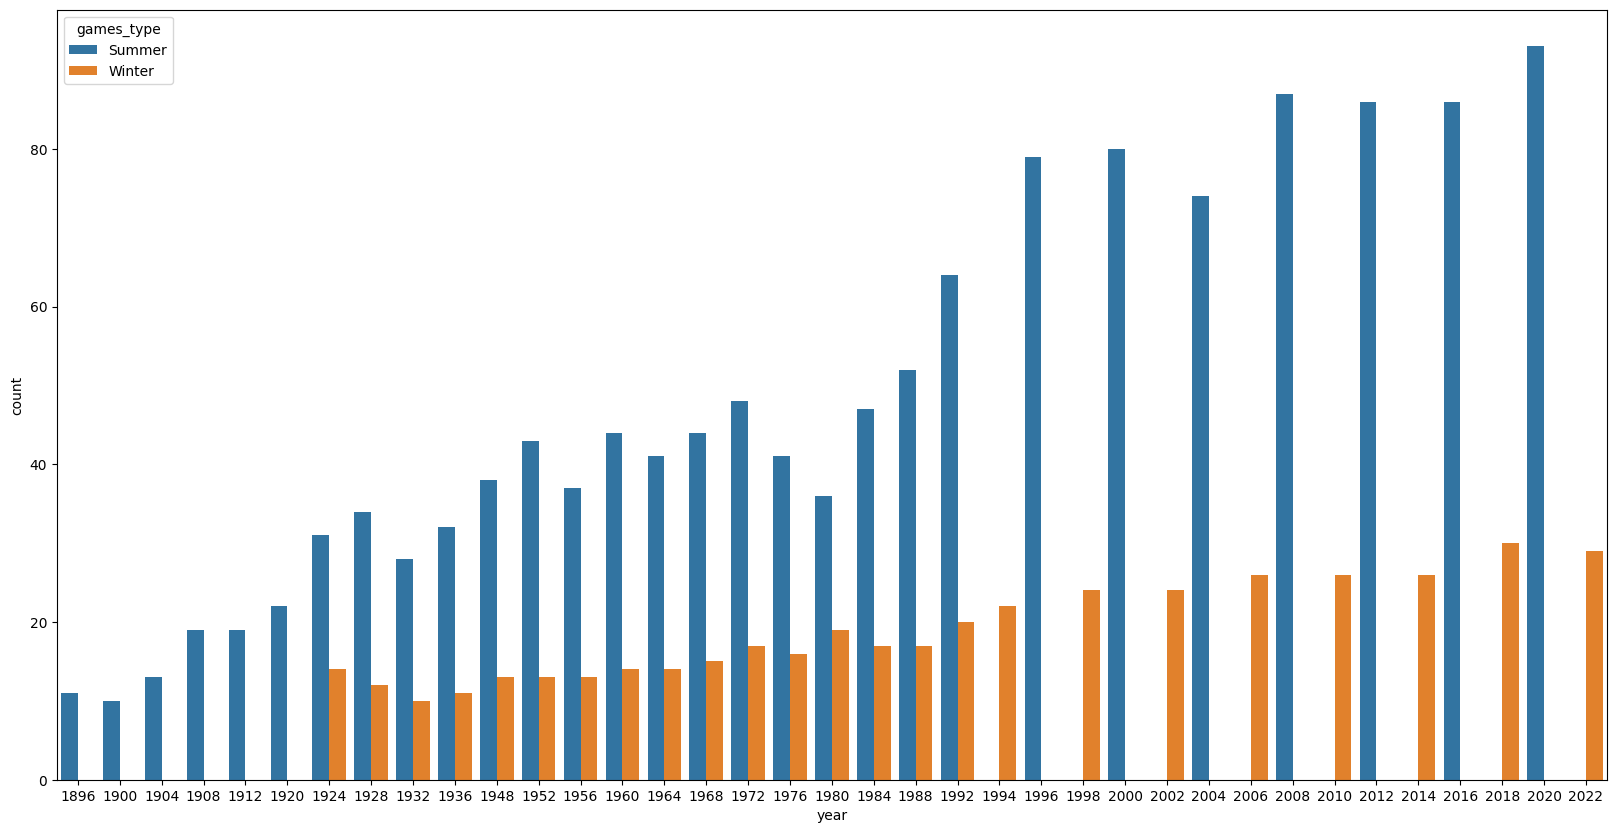

In [13]:
f = plt.figure(figsize=(20,10))
sns.countplot(x = data["year"], hue=data["games_type"], stat="count")
plt.savefig('5.png')

In [14]:
data.isnull().sum()

year             0
games_type       0
host_country     0
host_city        0
athletes         0
teams            0
competitions     0
country          0
gold_medals      0
silver_medals    0
bronze_medals    0
dtype: int64

In [15]:
import scipy as sp
a = np.array(data['gold_medals'][:200])
print(sp.stats.normaltest(a))

NormaltestResult(statistic=180.9784076239443, pvalue=5.023866758372769e-40)


In [16]:
data = pd.get_dummies(data, dtype=float)
data

,year,athletes,teams,competitions,gold_medals,silver_medals,bronze_medals,games_type_Summer,games_type_Winter,host_country_Australia,...,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,"country_Virgin Islands, US",country_Yugoslavia,country_Zambia,country_Zimbabwe
0,2022,2834,91,109,1,2,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,2834,91,109,7,7,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,2834,91,109,0,2,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,2834,91,109,1,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,2834,91,109,4,8,14,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1896,241,14,43,2,1,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1777,1896,241,14,43,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1778,1896,241,14,43,1,2,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1779,1896,241,14,43,3,3,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data.to_csv('res.csv',sep=';',index=False)